<div style="text-align: right"> <font color='Gray'> Sociofísica - 2023 </div>
<div style="text-align: right"> <font color='Gray'> Tarea N° 4 </div>
<div style="text-align: right"> <font color='Gray'> Sebastián Pulgares </div>


***

Modelo del Umbral
---
Este modelo representa un comportamiento colectivo donde la decisión de un agente depende de qué porcentaje del total de agentes tomó esta decisión, en particular consideramos el ejemplo de una protesta.

Cada agente tiene un Umbral definido de cuantos otros agentes es necesario que estén protestando para unirse, se estudian 2 formas de distribuir el umbral dentro de una población de $N$ agentes, en el primer caso, con una distribución uniforme el equilibrio el el total de la población, mientras que para una distribución normal el equilibrio se alcanza cuando la curva cruza la linea de identidad.
....

Simulacion
---
Se define una función para cada distribución y una función que llama a la que se busca graficar, para la distribución uniforme se utilizó una media de 0.4 y una desviación estandar de 0.2

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
def uniforme(tamaño, Umbral): # Se define la función con la distribución uniforme
    Agents=np.random.randint(0,100,tamaño) # Asigna un umbral a cada agente
    adhesion=0 
    retraccion=0
    for i in range(len(Agents)): #Verifica si hay suficiente gente protestando
        if Agents[i]>Umbral:
            retraccion+=1
        if Agents[i]<=Umbral:
            adhesion+=1
    if np.ceil((adhesion/len(Agents))*100)<1:
        Umbral=np.ceil((adhesion/len(Agents))*100)
    else:
        Umbral=adhesion
        #print(Umbral, adhesion,retraccion)
    return adhesion

In [4]:
def normal(tamaño, media, std,  Umbral): # Se define la función con la distribución normal
    Agents=np.ceil(np.abs(np.random.normal(media,std,tamaño))*100) # Asigna un umbral a cada agente
    adhesion=0
    retraccion=0
    for i in range(len(Agents)): #Verifica si hay suficiente gente protestando
        if Agents[i]>Umbral:
            retraccion+=1
        if Agents[i]<=Umbral:
            adhesion+=1
    if np.ceil((adhesion/len(Agents))*100)<1:
        Umbral=np.ceil((adhesion/len(Agents))*100)
    else:
        Umbral=adhesion
        #print(Umbral, adhesion,retraccion)
    return adhesion

In [37]:
def simul(funcion,carpeta,media=0,std=0): #Se define una única función que correrá los modelos
    path='./Simulacion/'+str(carpeta)
    if not os.path.exists(path):
        os.makedirs(path, exist_ok=True)
    wa=np.linspace(0,100,100) #El gráfico es para valores del umbral entre 0 y 100
    lista=[]
    for elem in range(len(wa)):
        if funcion==uniforme:
            with open(path+'/log.txt', 'w') as file: ##Archivo que guardará los parámetros usados
                file.write( 'Se utilizó la distribución uniforme')
            asd=uniforme(1000,wa[elem])
            lista.append(asd/10)
        if funcion==normal:
            asd=normal(1000,media, std, wa[elem])
            lista.append(asd/10)
            with open(path+'/log.txt', 'w') as file:
                file.write( 'Se utilizó la distribución normal'+'\n')
                file.write("La media utilizada fue: "+str(media)+'\n')
                file.write("La desviación utilizada fue: "+str(std)+'\n')
    plt.plot(wa,lista)
    plt.plot(wa,wa, 'r--')
    plt.grid(True)
    plt.savefig(path+'/simul.png')

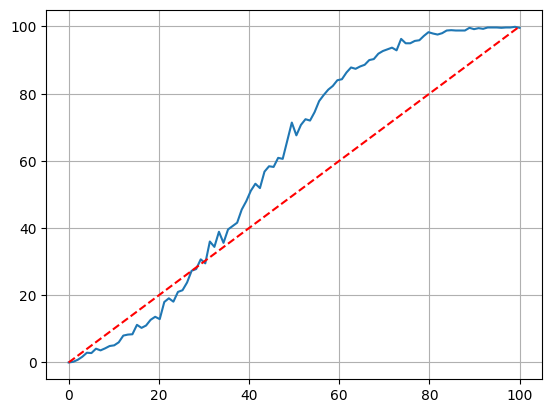

In [38]:
simul(normal, 'testing2', 0.4,0.2)